<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>

<h1 style="text-align: center;">Deep Learning<br><br>Image Classification with CNN<br><br>Cat-Dog Classification Project<br><h1>

# Dataset Info

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set includes 6897 cat and dogs images together.

# Dataset

***Warning: Large size dataset!!! (567.8MB)***

https://drive.google.com/file/d/1U32kQ5bttTUtkMuiL4zp5zQ6l4-djn53/view?usp=drive_link

# Import Libraries and Export Images from Zip_File

In [1]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this message.")

You can safely ignore this message.


In [2]:
import os

# Set TF log level to ignore INFOs
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

#import warnings
#warnings.filterwarnings("ignore")
#warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [4]:
from tensorflow import keras
import tensorflow as tf

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

CPU will be used for this session.


In [5]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) `tensorflow` random seed
# 3) `python` random seed
SEED = 42
keras.utils.set_random_seed(SEED)

# This will make TensorFlow ops as deterministic as possible, but it will
# affect the overall performance, so it's not enabled by default.
# `enable_op_determinism()` is introduced in TensorFlow 2.9.
tf.config.experimental.enable_op_determinism()

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# filepath = '/content/drive/MyDrive/Colab Notebooks/cat_dog_data.zip'
# filepath = './cat_dog_data.zip'


In [8]:
import zipfile
# Unzip the file
zip_ref = zipfile.ZipFile('./cat_dog_data.zip')
# If you are running this code in an environment like Google Colab, the files will typically be extracted to the /content directory.
zip_ref.extractall()
zip_ref.close()

# Recognizing and Understanding Data

In [9]:
my_data_dir = "data"

In [10]:
os.listdir(my_data_dir)

['test', 'train', 'validation']

In [11]:
val_path = os.path.join(my_data_dir, "validation")
train_path = os.path.join(my_data_dir, "train")
test_path = os.path.join(my_data_dir, "test")
test_path

'data/test'

In [12]:
os.listdir(train_path)

['cat', 'dog']

In [13]:
os.listdir(val_path)

['cat', 'dog']

In [14]:
os.listdir(test_path)[:5]

['6400.jpg', '4217.jpg', '3578.jpg', '10321.jpg', '5109.jpg']

**Let's check how many images there are.**

In [15]:
len(os.listdir(os.path.join(train_path + "/cat"))), len(
    os.listdir(os.path.join(train_path + "/dog"))
)

(12500, 5026)

In [16]:
len(os.listdir(os.path.join(val_path + "/cat"))), len(
    os.listdir(os.path.join(val_path + "/dog"))
)

(1219, 1071)

In [17]:
for dirpath, dirnames, filenames in os.walk(my_data_dir):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in 'data'.
There are 0 directories and 6897 images in 'data/test'.
There are 2 directories and 0 images in 'data/train'.
There are 0 directories and 12500 images in 'data/train/cat'.
There are 0 directories and 5026 images in 'data/train/dog'.
There are 2 directories and 0 images in 'data/validation'.
There are 0 directories and 1219 images in 'data/validation/cat'.
There are 0 directories and 1071 images in 'data/validation/dog'.


In [18]:
train_dog_rate = round(5026/17526, 2)
train_cat_rate = 1 - train_dog_rate
valid_dog_rate = round(1071/17526, 2)
valid_cat_rate = 1 - valid_dog_rate

print(f"Train class distribution: ", train_dog_rate, train_cat_rate)
print(f"Validation class distribution: ",valid_dog_rate, valid_cat_rate)

Train class distribution:  0.29 0.71
Validation class distribution:  0.06 0.94


**Let's take an example images from both train-cat and train-dog folders to observe process**

In [19]:
os.listdir(os.path.join(train_path + "/cat"))[0]

'cat.5077.jpg'

In [20]:
os.listdir(os.path.join(train_path + "/dog"))[0]

'dog.1753.jpg'

In [21]:
path1 = os.path.join(train_path + "/cat", os.listdir(os.path.join(train_path + "/cat"))[0])
path2 = os.path.join(train_path + "/dog", os.listdir(os.path.join(train_path + "/dog"))[0])

In [22]:
cat_img = imread(path1)
dog_img = imread(path2)

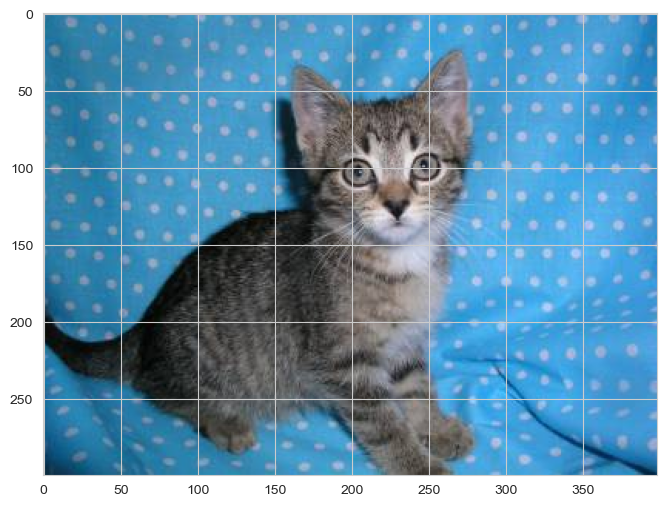

In [23]:
plt.imshow(cat_img)
plt.show()

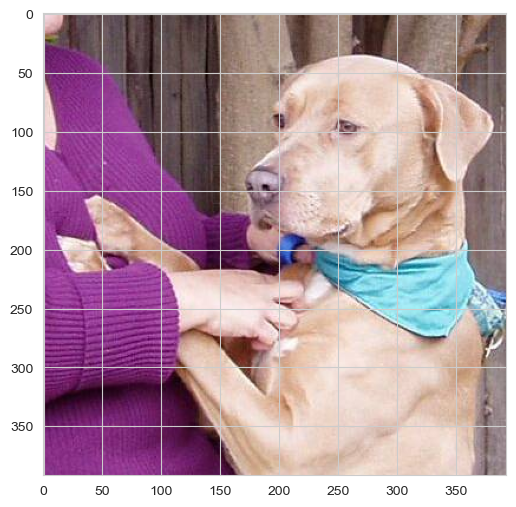

In [24]:
plt.imshow(dog_img)
plt.show()

In [25]:
import random

def view_random_image(target_dir, target_class):
    # Setup target directory (we'll view images from here)
    target_folder = os.path.join(target_dir,target_class)

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = imread(os.path.join(target_folder, random_image[0]))
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}") # show the shape of the image

    return img

# Data Preprocessing

## Defining Input Shape

**Let's decide on the final dimension of these images.**

In [26]:
cat_img.shape

(300, 399, 3)

In [27]:
dog_img.shape

(392, 393, 3)

In [28]:
x = []
y = []

for image in os.listdir(os.path.join(train_path + "/cat")):

    img = imread(os.path.join(train_path + "/cat", image))
    d1, d2,_ = img.shape
    x.append(d1)
    y.append(d2)

In [29]:
x = [
    imread(os.path.join(train_path + "/cat", image)).shape[0]
    for image in os.listdir(os.path.join(train_path + "/cat"))
]

y = [
    imread(os.path.join(train_path + "/cat", image)).shape[1]
    for image in os.listdir(os.path.join(train_path + "/cat"))
]


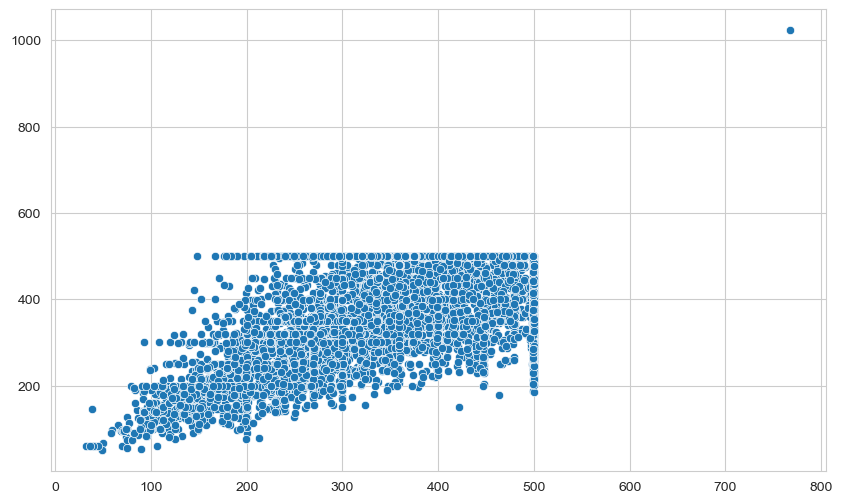

In [30]:
sns.scatterplot(x=x, y=y)
plt.show()

In [31]:
np.mean(x), np.median(x)

(np.float64(356.46712), np.float64(374.0))

In [32]:
np.mean(y), np.median(y)

(np.float64(410.52264), np.float64(470.0))

In [33]:
image_shape = (128, 128, 3)

In [34]:
x_dog = [
    imread(os.path.join(train_path, "dog", image)).shape[0]
    for image in os.listdir(os.path.join(train_path, "dog"))
]
y_dog = [
    imread(os.path.join(train_path, "dog", image)).shape[1]
    for image in os.listdir(os.path.join(train_path, "dog"))
]

In [35]:
x += x_dog
y += y_dog
print(np.mean(x), np.median(x))
print(np.mean(y), np.median(y))

358.92862033550153 374.0
407.2162501426452 453.0


## Scaling

**Let's check the images if they are needed to be scaled or not**

In [36]:
cat_img.max()

np.uint8(255)

In [37]:
cat_img.min()

np.uint8(0)

In [38]:
dog_img.max(), dog_img.min()

(np.uint8(255), np.uint8(0))

## Image Data Generator

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

Data augmentation is a way to try and prevent a model overfitting. If your model is overfiting (e.g. the validation loss keeps increasing), you may want to try using data augmentation.

In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [40]:
# help(ImageDataGenerator)

In [41]:
image_gen = ImageDataGenerator(
    rotation_range=15,  # rotate the image 15 degrees
    width_shift_range=0.10,  # Shift the pic width by a max of 10%
    height_shift_range=0.10,  # Shift the pic height by a max of 10%
    rescale=1 / 255,  # Rescale the image by normalzing it.
    shear_range=0.1,  # Shear means cutting away part of the image (max 10%)
    zoom_range=0.1,  # Zoom in by 10% max
    horizontal_flip=True,  # Allow horizontal flipping
    fill_mode="nearest",  # Fill in missing pixels with the nearest filled value
)

In [42]:
val_image_gen = ImageDataGenerator(rescale=1 / 255)

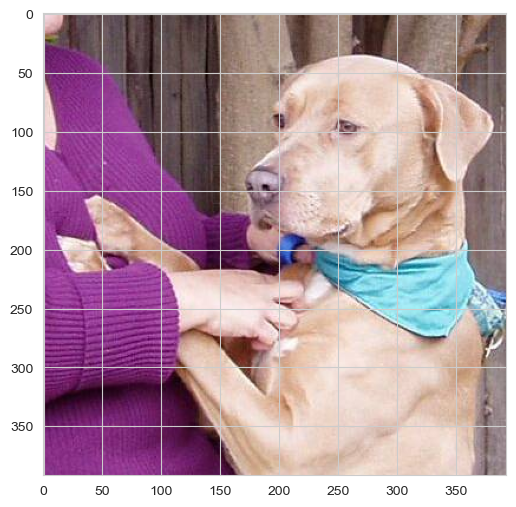

In [43]:
plt.imshow(dog_img)
plt.show()

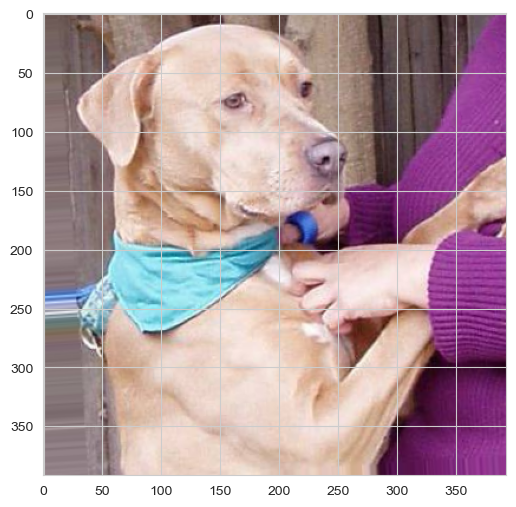

In [44]:
plt.imshow(image_gen.random_transform(dog_img))
plt.show()

### Taking the path to a directory & Generating batches of augmented data

flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

In [45]:
# help(image_gen.flow_from_directory)
# Takes the path to a directory & generates batches of augmented data.

In [46]:
image_gen.flow_from_directory(train_path)

Found 17526 images belonging to 2 classes.


In [47]:
val_image_gen.flow_from_directory(val_path)

Found 2290 images belonging to 2 classes.


In [48]:
image_gen.flow_from_directory(test_path)

Found 0 images belonging to 0 classes.


In [49]:
batch_size = 32

In [50]:
image_shape

(128, 128, 3)

In [51]:
train_image_gen = image_gen.flow_from_directory(
    directory=train_path,
    target_size=image_shape[:2],
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="binary",
    shuffle=True,
)

Found 17526 images belonging to 2 classes.


In [52]:
val_image_gen = val_image_gen.flow_from_directory(
    directory=val_path,
    target_size=image_shape[:2],
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="binary",
    shuffle=False,
)

Found 2290 images belonging to 2 classes.


In [53]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [54]:
val_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [55]:
train_image_gen[0][0].shape

(32, 128, 128, 3)

In [56]:
len(train_image_gen), len(val_image_gen)

(548, 72)

In [57]:
len(train_image_gen) * batch_size, len(val_image_gen) * batch_size

(17536, 2304)

In [58]:
# Get a sample of the training data batch
images, labels = next(train_image_gen)  # get the 'next' batch of images/labels
images.shape, labels.shape

((32, 128, 128, 3), (32,))

In [59]:
# Get a sample of the testing data batch
images, labels = next(val_image_gen)  # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

# Modelling

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [61]:
model = Sequential()

model.add(
    Conv2D(
        filters=32,
        kernel_size=(3, 3), # feature detector. filter
        input_shape=(128, 128, 3),
        activation="relu",
        padding="same",
    )
)

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=48, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=48, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [62]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 48)     │        13,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 48)     │        20,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,572,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,616,865 (6.17 MB)

 Trainable params: 1,616,865 (6.17 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
from tensorflow.keras.callbacks import EarlyStopping

In [64]:
early_stop = EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True)

In [65]:
model.fit(
    train_image_gen,
    batch_size=32,
    epochs=20,
    steps_per_epoch=len(train_image_gen),
    validation_steps=len(val_image_gen),
    validation_data=val_image_gen,
    callbacks=[early_stop],
)

Epoch 1/20


/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/losses/losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


548/548 ━━━━━━━━━━━━━━━━━━━━ 76s 138ms/step - accuracy: 0.2830 - loss: 0.0000e+00 - val_accuracy: 0.4677 - val_loss: 0.0000e+00
Epoch 2/20
548/548 ━━━━━━━━━━━━━━━━━━━━ 76s 139ms/step - accuracy: 0.2905 - loss: 0.0000e+00 - val_accuracy: 0.4677 - val_loss: 0.0000e+00
Epoch 3/20
548/548 ━━━━━━━━━━━━━━━━━━━━ 76s 139ms/step - accuracy: 0.2894 - loss: 0.0000e+00 - val_accuracy: 0.4677 - val_loss: 0.0000e+00
Epoch 4/20
548/548 ━━━━━━━━━━━━━━━━━━━━ 81s 147ms/step - accuracy: 0.2918 - loss: 0.0000e+00 - val_accuracy: 0.4677 - val_loss: 0.0000e+00
Epoch 5/20
548/548 ━━━━━━━━━━━━━━━━━━━━ 76s 139ms/step - accuracy: 0.2876 - loss: 0.0000e+00 - val_accuracy: 0.4677 - val_loss: 0.0000e+00


In [66]:
model.metrics_names

['loss', 'compile_metrics']

In [67]:
summary = pd.DataFrame(model.history.history)
summary.head()

,accuracy,loss,val_accuracy,val_loss
0,0.287,0.000,0.468,0.000
1,0.287,0.000,0.468,0.000
2,0.287,0.000,0.468,0.000
3,0.287,0.000,0.468,0.000
4,0.287,0.000,0.468,0.000


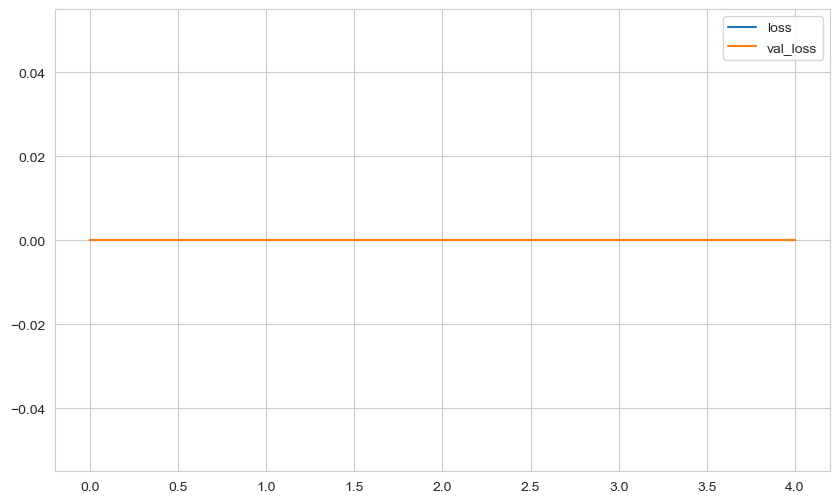

In [68]:
summary[["loss", "val_loss"]].plot()
plt.show()

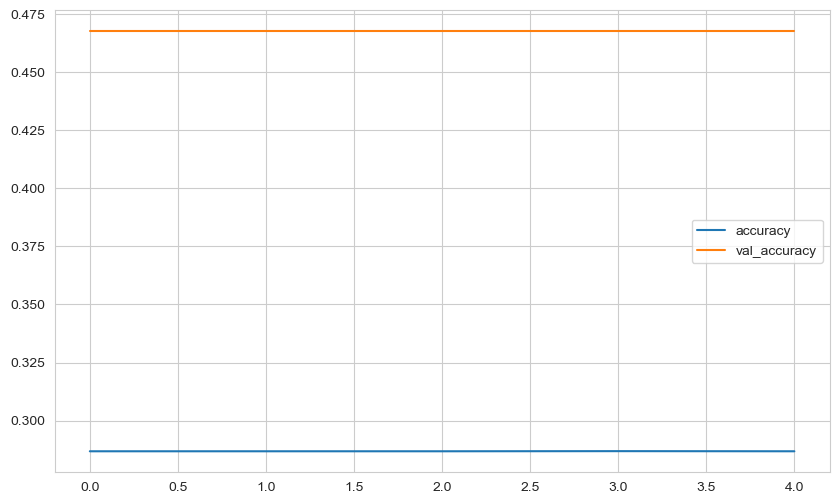

In [69]:
summary[["accuracy", "val_accuracy"]].plot()
plt.show()

# Evaluation on Test Data

In [70]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    multilabel_confusion_matrix,
)

In [71]:
model.evaluate(val_image_gen)

72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.1418 - loss: 0.0000e+00


[0.0, 0.4676855802536011]

In [72]:
score = model.evaluate(val_image_gen, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0
Test accuracy: 0.4676855802536011


In [73]:
pred_prob = model.predict(val_image_gen)
pred_prob

72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step


array([[0.51985556],
       [0.52662146],
       [0.52664936],
       ...,
       [0.52110827],
       [0.5278294 ],
       [0.52675337]], shape=(2290, 1), dtype=float32)

In [74]:
y_pred = pred_prob > 0.5
y_pred

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]], shape=(2290, 1))

In [75]:
y_test = val_image_gen.classes
y_test

array([0, 0, 0, ..., 1, 1, 1], shape=(2290,), dtype=int32)

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1219
           1       0.47      1.00      0.64      1071

    accuracy                           0.47      2290
   macro avg       0.23      0.50      0.32      2290
weighted avg       0.22      0.47      0.30      2290



/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/tf/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [77]:
confusion_matrix(y_test, y_pred)

array([[   0, 1219],
       [   0, 1071]])

In [78]:
model.save("cat-dog_model.keras")

# Prediction

In [79]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [80]:
model = load_model("cat-dog_model.keras")

In [81]:
class_names = ['cat','dog']

In [82]:
target_class = random.choice(class_names)
target_class

'dog'

In [83]:
random_image = random.sample(os.listdir(test_path), 1)
random_image

['7038.jpg']

In [84]:
image_path = os.path.join(test_path, random_image[0])
image_path

'data/test/7038.jpg'

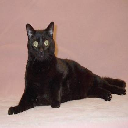

In [85]:
my_image = image.load_img(image_path, target_size=image_shape)
my_image

In [86]:
type(my_image)

PIL.Image.Image

In [87]:
my_image = image.img_to_array(my_image)

In [88]:
my_image.shape

(128, 128, 3)

In [89]:
my_image = np.expand_dims(my_image, axis=0)

In [90]:
my_image.shape

(1, 128, 128, 3)

In [91]:
model.predict(my_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


2025-02-28 19:22:44.087171: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
2025-02-28 19:22:44.087436: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),

array([[1.]], dtype=float32)

In [92]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [93]:
def pred_and_plot(model, img_size):
    """
    Imports an image located at filename, makes a prediction on it with
    a trained model and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    target_class = random.choice(class_names)
    random_image = random.sample(os.listdir(test_path), 1)
    img_path = os.path.join(test_path, random_image[0])
    img = image.load_img(img_path, target_size=img_size)
    img = np.array(img)

    # Make a prediction
    pred = model.predict(np.expand_dims(img, axis=0))
    print("prediction_probability: ", pred.max())

    # Get the predicted class
    if len(pred[0]) > 1:  # check for multi-class
        pred_class = class_names[pred.argmax()]  # if more than one output, take the max
    else:
        pred_class = class_names[int(tf.round(pred)[0][0])]  # if only one output, round

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
prediction_probability:  1.0


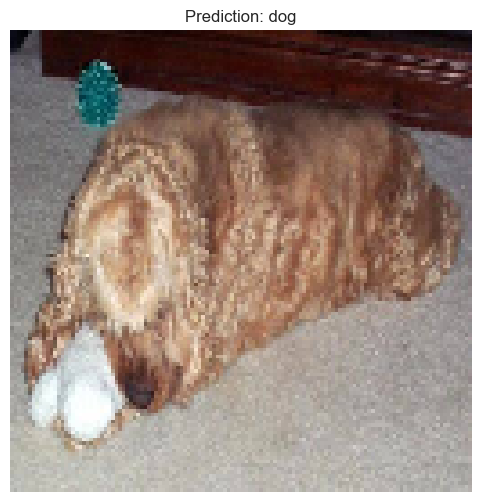

In [94]:
pred_and_plot(model, (128, 128))

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>